In [67]:
# Imports
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Random Seed
RANDOM_SEED = 42

# Specify each path

In [68]:
# File Paths
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [69]:
# Number of classifications in the model
NUM_CLASSES = 27

# Dataset reading

In [70]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [71]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [72]:
# Train/Test spilt - 25/75
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [73]:
#RNN Model using Tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 27)                297       
                                                                 
Total params: 1,367
Trainable params: 1,367
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
44/61 [====================>.........] - ETA: 0s - loss: 3.3126 - accuracy: 0.0474
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 1s 7ms/step - loss: 3.2988 - accuracy: 0.0508 - val_loss: 3.2550 - val_accuracy: 0.0719
Epoch 2/1000
43/61 [====================>.........] - ETA: 0s - loss: 3.2338 - accuracy: 0.0738
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 4ms/step - loss: 3.2205 - accuracy: 0.0779 - val_loss: 3.1524 - val_accuracy: 0.1496
Epoch 3/1000
49/61 [=======================>......] - ETA: 0s - loss: 3.1118 - accuracy: 0.1009
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
61/61 [==============================] - 0s 4ms/step - loss: 3.0959 - accuracy: 0.1021 - val_loss: 2.9316 - val_accuracy: 0.1685
Epoch 4/1000
50/61 [=======================>......] - ETA: 0s - loss: 2.9096 - accuracy: 0.1273
E

In [78]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.9135


In [79]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [80]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 65ms/step
[2.9867723e-25 1.1569258e-03 7.0318376e-04 7.4344815e-04 1.0425440e-12
 2.1004064e-03 9.8789936e-01 4.4855373e-19 1.0311024e-11 8.9022406e-10
 1.5475451e-05 1.3432363e-27 7.8386329e-16 2.4039948e-09 1.9529013e-10
 6.9158678e-03 5.2606292e-21 6.0071927e-11 2.8876442e-04 2.0630796e-05
 1.7539419e-06 3.4563727e-18 8.6479663e-22 3.6370845e-06 7.5707084e-07
 1.4984688e-04 7.7201264e-27]
6


# Confusion matrix

82/82 [==============================] - 0s 1ms/step


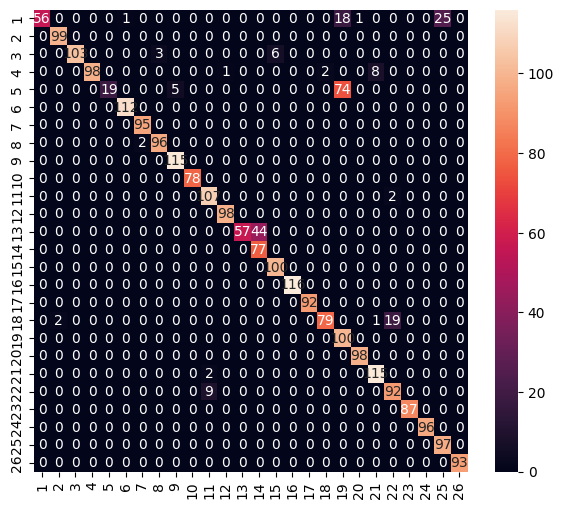

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.55      0.71       101
           2       0.98      1.00      0.99        99
           3       1.00      0.92      0.96       112
           4       1.00      0.90      0.95       109
           5       1.00      0.19      0.32        98
           6       0.99      1.00      1.00       112
           7       0.98      1.00      0.99        95
           8       0.97      0.98      0.97        98
           9       0.96      1.00      0.98       115
          10       1.00      1.00      1.00        78
          11       0.91      0.98      0.94       109
          12       0.99      1.00      0.99        98
          13       1.00      0.56      0.72       101
          14       0.64      1.00      0.78        77
          15       0.94      1.00      0.97       100
          16       1.00      1.00      1.00       116
          17       1.00      1.00      1.00        92
     

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [82]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [83]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\callu\AppData\Local\Temp\tmp0qng8krw\assets


INFO:tensorflow:Assets written to: C:\Users\callu\AppData\Local\Temp\tmp0qng8krw\assets


7608

# Inference test

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [85]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [88]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.9867953e-25 1.1569269e-03 7.0318283e-04 7.4344920e-04 1.0425479e-12
 2.1004083e-03 9.8789936e-01 4.4855720e-19 1.0311044e-11 8.9023083e-10
 1.5475480e-05 1.3432362e-27 7.8387224e-16 2.4039901e-09 1.9529087e-10
 6.9158804e-03 5.2606692e-21 6.0072385e-11 2.8876468e-04 2.0630854e-05
 1.7539469e-06 3.4563858e-18 8.6479996e-22 3.6370848e-06 7.5707374e-07
 1.4984744e-04 7.7202134e-27]
6
